In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,classification_report,confusion_matrix,log_loss,f1_score
from sklearn.model_selection import cross_val_score,KFold

In [2]:
X = pd.read_csv('Election_X.csv')
y= pd.read_csv('Election_y.csv')

In [8]:
oversample = SMOTE()
x_SMOTE, y_SMOTE = oversample.fit_resample(X,y)

In [18]:
x_trainS,x_testS,y_trainS,y_testS = train_test_split(x_SMOTE,y_SMOTE,test_size=.30,random_state=1)

#### Bagging Classifier after SMOTE

In [19]:
Model_Bag_Smote = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=50,random_state=1,max_depth=4,min_samples_leaf=15,
                                                                         min_samples_split=45),n_estimators=50).fit(x_trainS,y_trainS)

# Evaluation metrics : Train and Test

BagS_Score_Train = Model_Bag_Smote.score(x_trainS,y_trainS)
BagS_Roc_Score_Train = roc_auc_score(y_trainS,Model_Bag_Smote.predict_proba(x_trainS)[:,1])
BagS_F1Score_Train = f1_score(y_trainS, Model_Bag_Smote.predict(x_trainS))
BagS_Log_loss_Train = log_loss(y_trainS, Model_Bag_Smote.predict(x_trainS))

BagS_Score_Test = Model_Bag_Smote.score(x_testS,y_testS)
BagS_Roc_Score_Test = roc_auc_score(y_testS,Model_Bag_Smote.predict_proba(x_testS)[:,1])
BagS_F1Score_Test = f1_score(y_testS, Model_Bag_Smote.predict(x_testS))
BagS_Log_loss_Test = log_loss(y_testS, Model_Bag_Smote.predict(x_testS))

Model_Metric_Smote = pd.DataFrame(index=['Accuracy','Roc_Score','F1_Score','Log_Loss'])
Model_Metric_Smote['Bag_S_Train'] = [BagS_Score_Train,BagS_Roc_Score_Train,BagS_F1Score_Train,BagS_Log_loss_Train]
Model_Metric_Smote['Bag_S_Test'] = [BagS_Score_Test,BagS_Roc_Score_Test,BagS_F1Score_Test,BagS_Log_loss_Test]
round(Model_Metric_Smote,3)

,Bag_S_Train,Bag_S_Test
Accuracy,0.844,0.820
Roc_Score,0.921,0.901
F1_Score,0.845,0.815
Log_Loss,5.395,6.201


#### ADA Boost Classifier after SMOTE

In [20]:
n_estimators = np.arange(50,110,10)
k_folds = KFold(n_splits=10, random_state=1)

for i in n_estimators:
    Model_adaS_boost = AdaBoostClassifier(n_estimators=i,random_state=1)
    Model_adaS_boost.fit(x_trainS, y_trainS)
    results = cross_val_score(Model_adaS_boost, x_testS, y_testS, cv=k_folds)
    print("Results for {} estimators:".format(i))
    print(results.mean())

Results for 50 estimators:
0.8155753968253968
Results for 60 estimators:
0.8171626984126984
Results for 70 estimators:
0.8124007936507937
Results for 80 estimators:
0.8139384920634921
Results for 90 estimators:
0.8171378968253968
Results for 100 estimators:
0.8092261904761905


In [21]:
Model_adaS_boost = AdaBoostClassifier(n_estimators=90,random_state=1).fit(x_trainS,y_trainS)

# Evaluation metrics (Train and Test)
ABoostS_Score_Train = Model_adaS_boost.score(x_trainS,y_trainS)
ABoostS_Roc_Score_Train = roc_auc_score(y_trainS,Model_adaS_boost.predict_proba(x_trainS)[:,1])
ABoostS_F1Score_Train = f1_score(y_trainS, Model_adaS_boost.predict(x_trainS))
ABoostS_Log_loss_Train = log_loss(y_trainS, Model_adaS_boost.predict(x_trainS))

ABoostS_Score_Test = Model_adaS_boost.score(x_testS,y_testS)
ABoostS_Roc_Score_Test = roc_auc_score(y_testS,Model_adaS_boost.predict_proba(x_testS)[:,1])
ABoostS_F1Score_Test = f1_score(y_testS, Model_adaS_boost.predict(x_testS))
ABoostS_Log_loss_Test = log_loss(y_testS, Model_adaS_boost.predict(x_testS))

Model_Metric_Smote['ABoost_S_Train'] = [ABoostS_Score_Train,ABoostS_Roc_Score_Train,ABoostS_F1Score_Train,ABoostS_Log_loss_Train]
Model_Metric_Smote['ABoost_S_Test'] = [ABoostS_Score_Test,ABoostS_Roc_Score_Test,ABoostS_F1Score_Test,ABoostS_Log_loss_Test]
round(Model_Metric_Smote,3)

,Bag_S_Train,Bag_S_Test,ABoost_S_Train,ABoost_S_Test
Accuracy,0.844,0.820,0.855,0.831
Roc_Score,0.921,0.901,0.929,0.905
F1_Score,0.845,0.815,0.857,0.825
Log_Loss,5.395,6.201,5.021,5.820


#### Model KNN after SMOTE:

In [23]:
Model_KNN_Smote = KNeighborsClassifier(n_neighbors=11,weights='uniform',metric='manhattan',algorithm='ball_tree')
Model_KNN_Smote.fit(x_trainS, y_trainS)

# Evaluation metrics (Train and Test)

KNNS_Score_Train = Model_KNN_Smote.score(x_trainS,y_trainS)
KNNS_Roc_Score_Train = roc_auc_score(y_trainS,Model_KNN_Smote.predict_proba(x_trainS)[:,1])
KNNS_F1Score_Train = f1_score(y_trainS, Model_KNN_Smote.predict(x_trainS))
KNNS_Log_loss_Train = log_loss(y_trainS, Model_KNN_Smote.predict(x_trainS))

KNNS_Score_Test = Model_KNN_Smote.score(x_testS,y_testS)
KNNS_Roc_Score_Test = roc_auc_score(y_testS,Model_KNN_Smote.predict_proba(x_testS)[:,1])
KNNS_F1Score_Test = f1_score(y_testS, Model_KNN_Smote.predict(x_testS))
KNNS_Log_loss_Test = log_loss(y_testS, Model_KNN_Smote.predict(x_testS))

Model_Metric_Smote['KNN_S_Train'] = [KNNS_Score_Train,KNNS_Roc_Score_Train,KNNS_F1Score_Train,KNNS_Log_loss_Train]
Model_Metric_Smote['KNN_S_Test'] = [KNNS_Score_Test,KNNS_Roc_Score_Test,KNNS_F1Score_Test,KNNS_Log_loss_Test]
round(Model_Metric_Smote,3)

,Bag_S_Train,Bag_S_Test,ABoost_S_Train,ABoost_S_Test,KNN_S_Train,KNN_S_Test
Accuracy,0.844,0.820,0.855,0.831,0.847,0.805
Roc_Score,0.921,0.901,0.929,0.905,0.936,0.896
F1_Score,0.845,0.815,0.857,0.825,0.842,0.787
Log_Loss,5.395,6.201,5.021,5.820,5.278,6.745


#### Model NB after SMOTE

In [25]:
Model_NB_Smote = GaussianNB()
Model_NB_Smote.fit(x_trainS, y_trainS)

# Evaluation metrics (Train and Test)

NBS_Score_Train = Model_NB_Smote.score(x_trainS,y_trainS)
NBS_Roc_Score_Train = roc_auc_score(y_trainS,Model_NB_Smote.predict_proba(x_trainS)[:,1])
NBS_F1Score_Train = f1_score(y_trainS, Model_NB_Smote.predict(x_trainS))
NBS_Log_loss_Train = log_loss(y_trainS, Model_NB_Smote.predict(x_trainS))

NBS_Score_Test = Model_NB_Smote.score(x_testS,y_testS)
NBS_Roc_Score_Test = roc_auc_score(y_testS,Model_NB_Smote.predict_proba(x_testS)[:,1])
NBS_F1Score_Test = f1_score(y_testS, Model_NB_Smote.predict(x_testS))
NBS_Log_loss_Test = log_loss(y_testS, Model_NB_Smote.predict(x_testS))

Model_Metric_Smote['NB_S_Train'] = [NBS_Score_Train,NBS_Roc_Score_Train,NBS_F1Score_Train,NBS_Log_loss_Train]
Model_Metric_Smote['NB_S_Test'] = [NBS_Score_Test,NBS_Roc_Score_Test,NBS_F1Score_Test,NBS_Log_loss_Test]

round(Model_Metric_Smote,3).T

,Accuracy,Roc_Score,F1_Score,Log_Loss
Bag_S_Train,0.844,0.921,0.845,5.395
Bag_S_Test,0.820,0.901,0.815,6.201
ABoost_S_Train,0.855,0.929,0.857,5.021
ABoost_S_Test,0.831,0.905,0.825,5.820
KNN_S_Train,0.847,0.936,0.842,5.278
KNN_S_Test,0.805,0.896,0.787,6.745
NB_S_Train,0.826,0.904,0.829,6.025
NB_S_Test,0.811,0.885,0.807,6.527


In [32]:
round(Model_Metric_Smote,3).T.sort_values(by='Accuracy',ascending=False).iloc[3:,:]

,Accuracy,Roc_Score,F1_Score,Log_Loss
ABoost_S_Test,0.831,0.905,0.825,5.820
NB_S_Train,0.826,0.904,0.829,6.025
Bag_S_Test,0.820,0.901,0.815,6.201
NB_S_Test,0.811,0.885,0.807,6.527
KNN_S_Test,0.805,0.896,0.787,6.745


In [29]:
# After SMOTE
Models = {Model_Bag_Smote: 'Bagging', Model_adaS_boost: 'Ada Boost',
          Model_KNN_Smote:'KNN',Model_NB_Smote:'NB'}

print('\033[1m','CV Scores for the models with best accuracy scores','\033[0m')
print('---------------------------------------------------------')
for i in Models:
    Scores = cross_val_score(i, x_testS, y_testS, cv=5)
    print('CV scores for {} model'.format(Models[i]))
    print(Scores)
    print(" ")

 CV Scores for the models with best accuracy scores 
---------------------------------------------------------
CV scores for Bagging model
[0.84251969 0.79527559 0.8503937  0.8503937  0.74015748]
 
CV scores for Ada Boost model
[0.84251969 0.82677165 0.84251969 0.82677165 0.75590551]
 
CV scores for KNN model
[0.87401575 0.78740157 0.77952756 0.75590551 0.76377953]
 
CV scores for NB model
[0.84251969 0.80314961 0.82677165 0.84251969 0.70866142]
 


#### ROC Curve:

 ROC Curve representation for the top models with accuracy more than 85%
----------------------------------------------------------------------
Area under the curve for KNN Model is 0.896
Area under the curve for Ada Boost Model is 0.905
Area under the curve for Bagging Model is 0.901


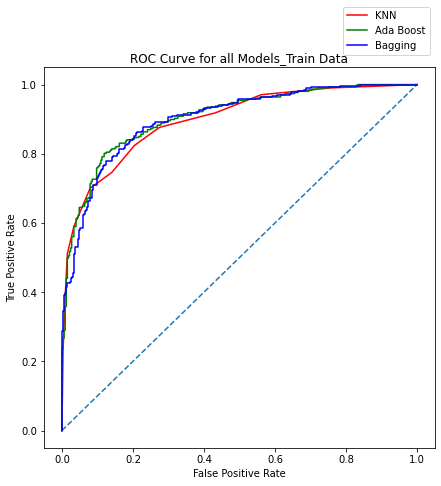

In [31]:
import matplotlib.pyplot as plt

print('\033[1m','ROC Curve representation for the top models with accuracy more than 85%''\033[0m')
print('----------------------------------------------------------------------')
print('Area under the curve for KNN Model is',round(KNNS_Roc_Score_Test,3))
print('Area under the curve for Ada Boost Model is',round(ABoostS_Roc_Score_Test,3))
print('Area under the curve for Bagging Model is',round(BagS_Roc_Score_Test,3))

fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_testS,pd.DataFrame(Model_KNN_Smote.predict_proba(x_testS)).iloc[:,1])
fpr_AB, tpr_AB, thresholds_AB = roc_curve(y_testS,pd.DataFrame(Model_adaS_boost.predict_proba(x_testS)).iloc[:,1])
fpr_Bag, tpr_Bag, thresholds_Bag = roc_curve(y_testS,pd.DataFrame(Model_Bag_Smote.predict_proba(x_testS)).iloc[:,1])

plt.figure(figsize=(7,7))
plt.plot([0, 1], [0, 1], linestyle='--');
plt.plot(fpr_KNN, tpr_KNN,color='red',label="KNN");
plt.plot(fpr_AB, tpr_AB,color='green',label="Ada Boost");
plt.plot(fpr_Bag, tpr_Bag,color='blue',label="Bagging");

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for all Models_Train Data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
plt.show()

#### Model Metric after SMOTE: 
1. The accuracy for the models are not improved.
2. The accuracy scores of KNN, Bagging and NB are dropped after smote.
3. So for further analysis, predictions from original data are considered.